#**Assignment on Classification**

Step 1 : Import the libraries

In [1]:
import pandas as pd             # python library to manipulate data. pandas is acronym of panneled data
import numpy as np              # numerical python . python library for arithmetical operations

#python library for data visualisation

import matplotlib.pyplot as plt # 2D ploting library
import seaborn as sns           # baseon matplotlib provides a high-level interface for drawing attractive and informative statistical graphics

**1. Read the dataset to python environment**

Step 2 : Import the data-set

In [2]:
from google.colab import files
files.upload()

Saving iris (2).xls to iris (2).xls


{'iris (2).xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00D\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00C\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff

In [3]:
# store the dataset into variable "data"

data=pd.read_excel('iris (2).xls')

In [4]:
#to display the initial 5 raws and columns in the dataset

data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# to check the total number of obsrvatios and columns present in the dataset

data.shape

(150, 5)

In [6]:
# there are 150 observations recorded in 5 columns

**2. Do the necessary pre-processing steps**

Pre Processing may include the following steps

Step 1 : Import the libraries (some are already imported and the others will be imported as per the needs)

Step 2 : Import the data-set ( Data set is also imported)

Step 3 : Check out the missing values

Step 4 : Check out the outliers

Step 5 : See the Categorical Values

Step 6 : Splitting the data-set into Training and Test Set

Step 7 : Feature Scaling

Step 3 : Check out the missing values

In [11]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [17]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [18]:
# Checking the percentage of null values in each feature
# Creating a list of features with null values

features_with_na=[features for features in data.columns if data[features].isna().sum()>=1]  #if null value greater than orequal to 1

# Print the feature name and percentage of missing values

for feature in features_with_na:
    print(feature,np.round(data[feature].isnull().mean(),2), ' % missing values')

SL 0.05  % missing values
SW 0.04  % missing values
PL 0.04  % missing values


In [27]:
# missing values can be handled during feature engineering

In [29]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
# Since the sizes of each species follow unique pattern seperate each species for ease of handling the missing values. 

Iris_setosa = data[data['Classification']=='Iris-setosa']
Iris_versicolor = data[data['Classification']=='Iris-versicolor']
Iris_virginica = data[data['Classification']=='Iris-virginica']

In [31]:
Iris_setosa

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [32]:
Iris_versicolor

,SL,SW,PL,PW,Classification
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,NaN,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [33]:
Iris_virginica

,SL,SW,PL,PW,Classification
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,NaN,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,NaN,2.5,Iris-virginica


In [34]:
print('Null values of Iris_setosa\n', Iris_setosa.isna().sum())
print('Null values of Iris-versicolor\n', Iris_versicolor.isna().sum())
print('Null values of Iris-virginica\n', Iris_virginica.isna().sum())

Null values of Iris_setosa
 SL                3
SW                3
PL                2
PW                0
Classification    0
dtype: int64
Null values of Iris-versicolor
 SL                2
SW                2
PL                2
PW                0
Classification    0
dtype: int64
Null values of Iris-virginica
 SL                2
SW                1
PL                2
PW                0
Classification    0
dtype: int64


In [35]:
# since these are numeric values either mean or median can be used to fill missing values

Plot the histogram to see the distribution curve of data

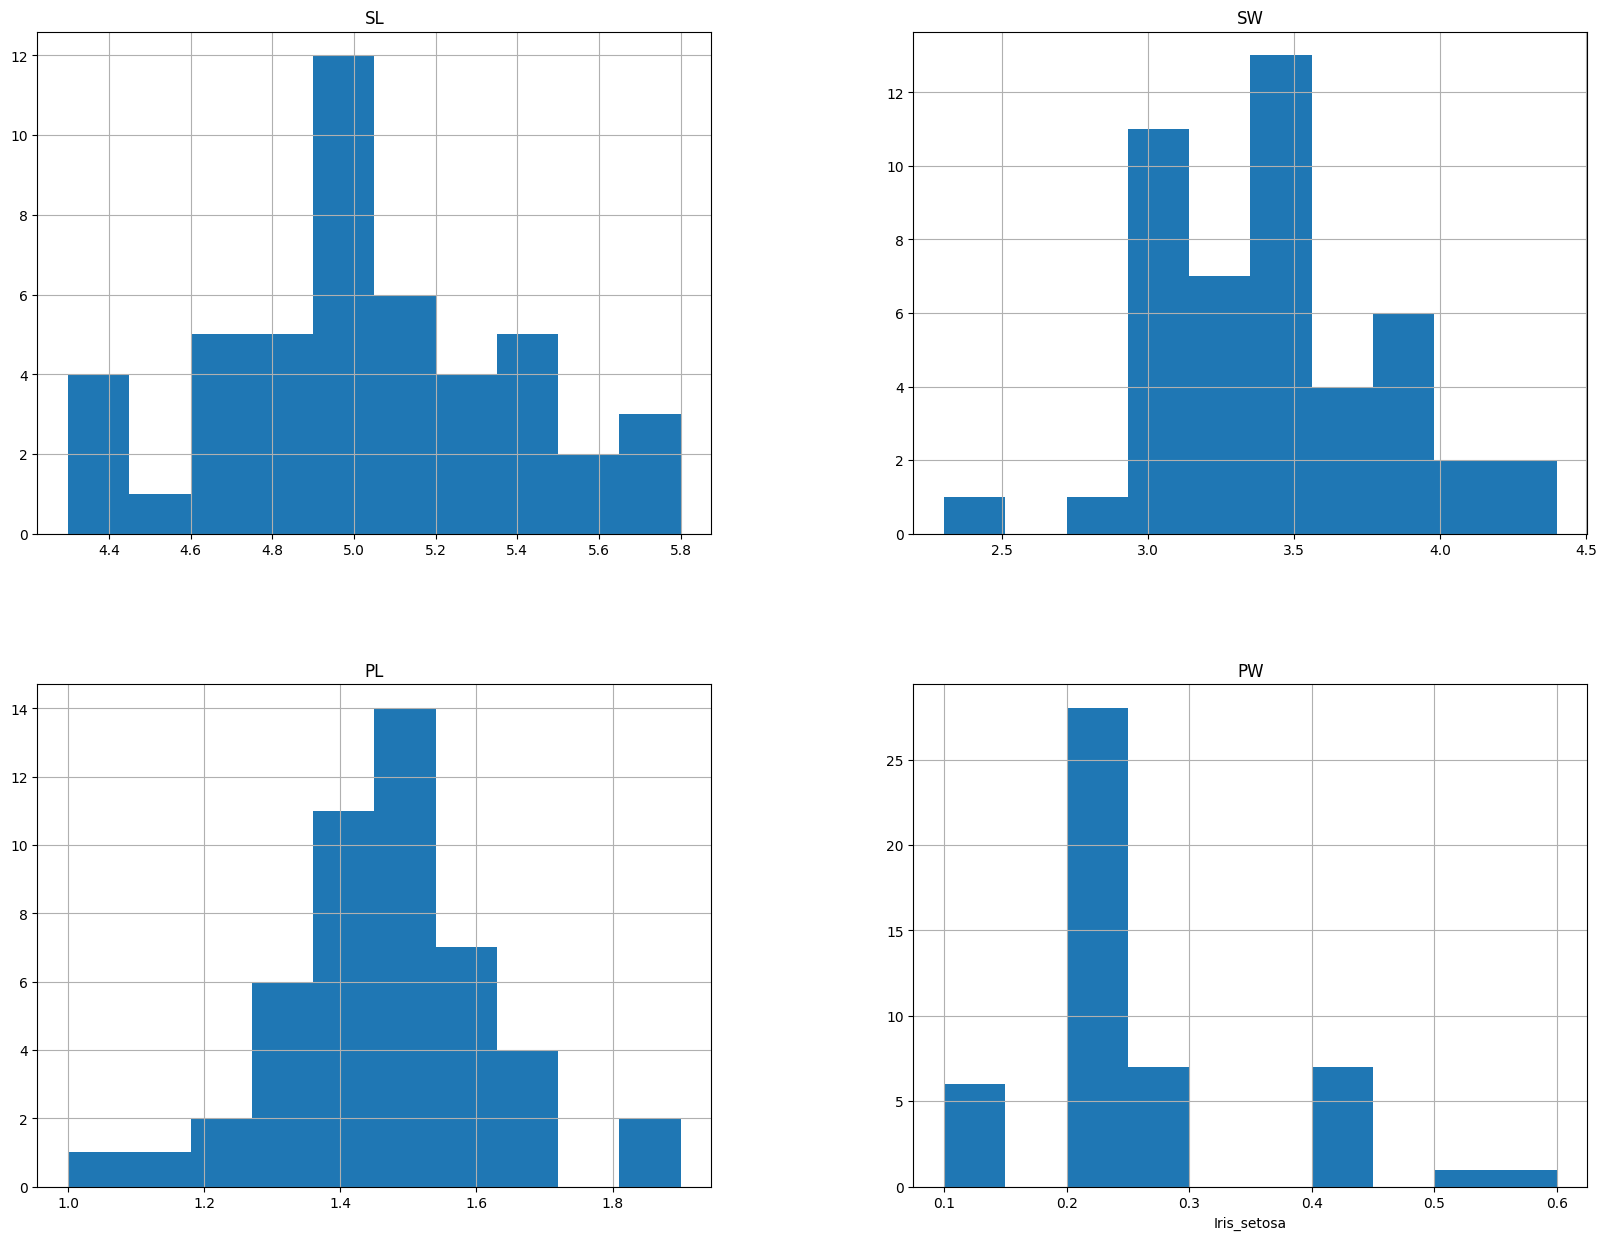

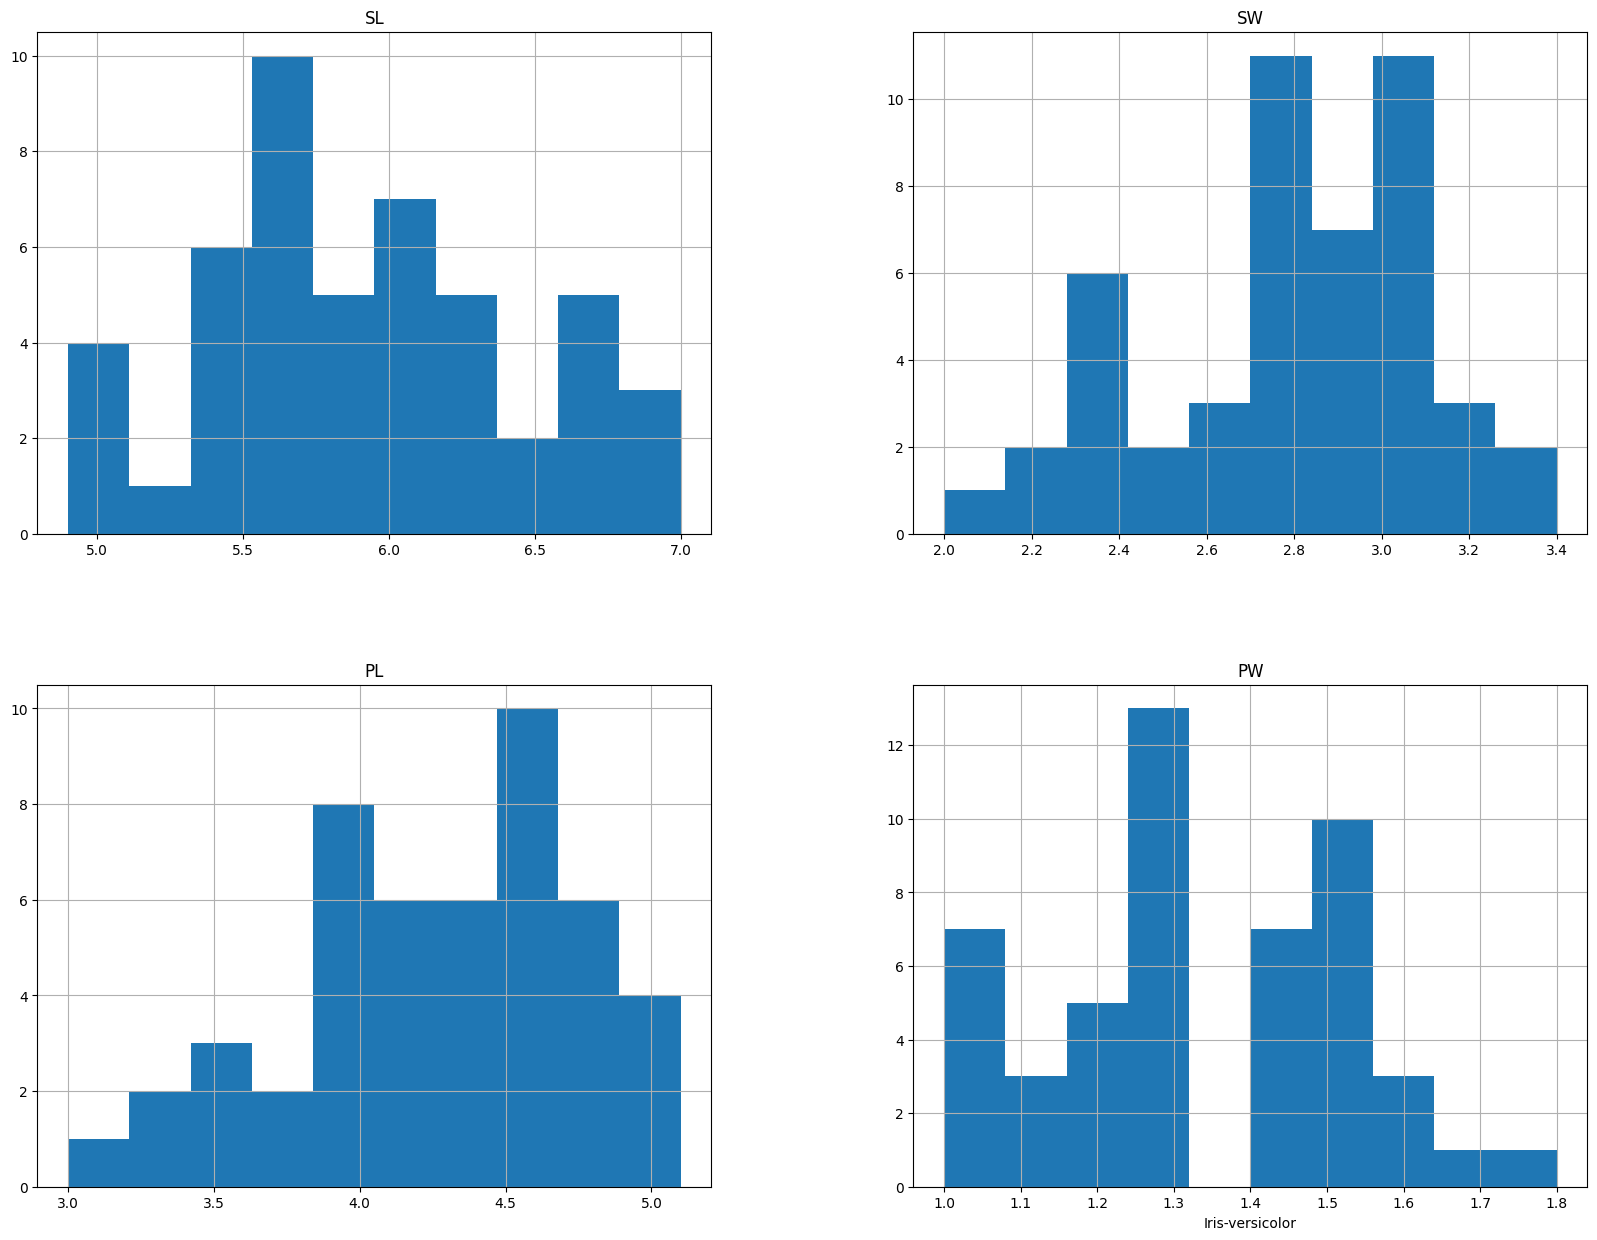

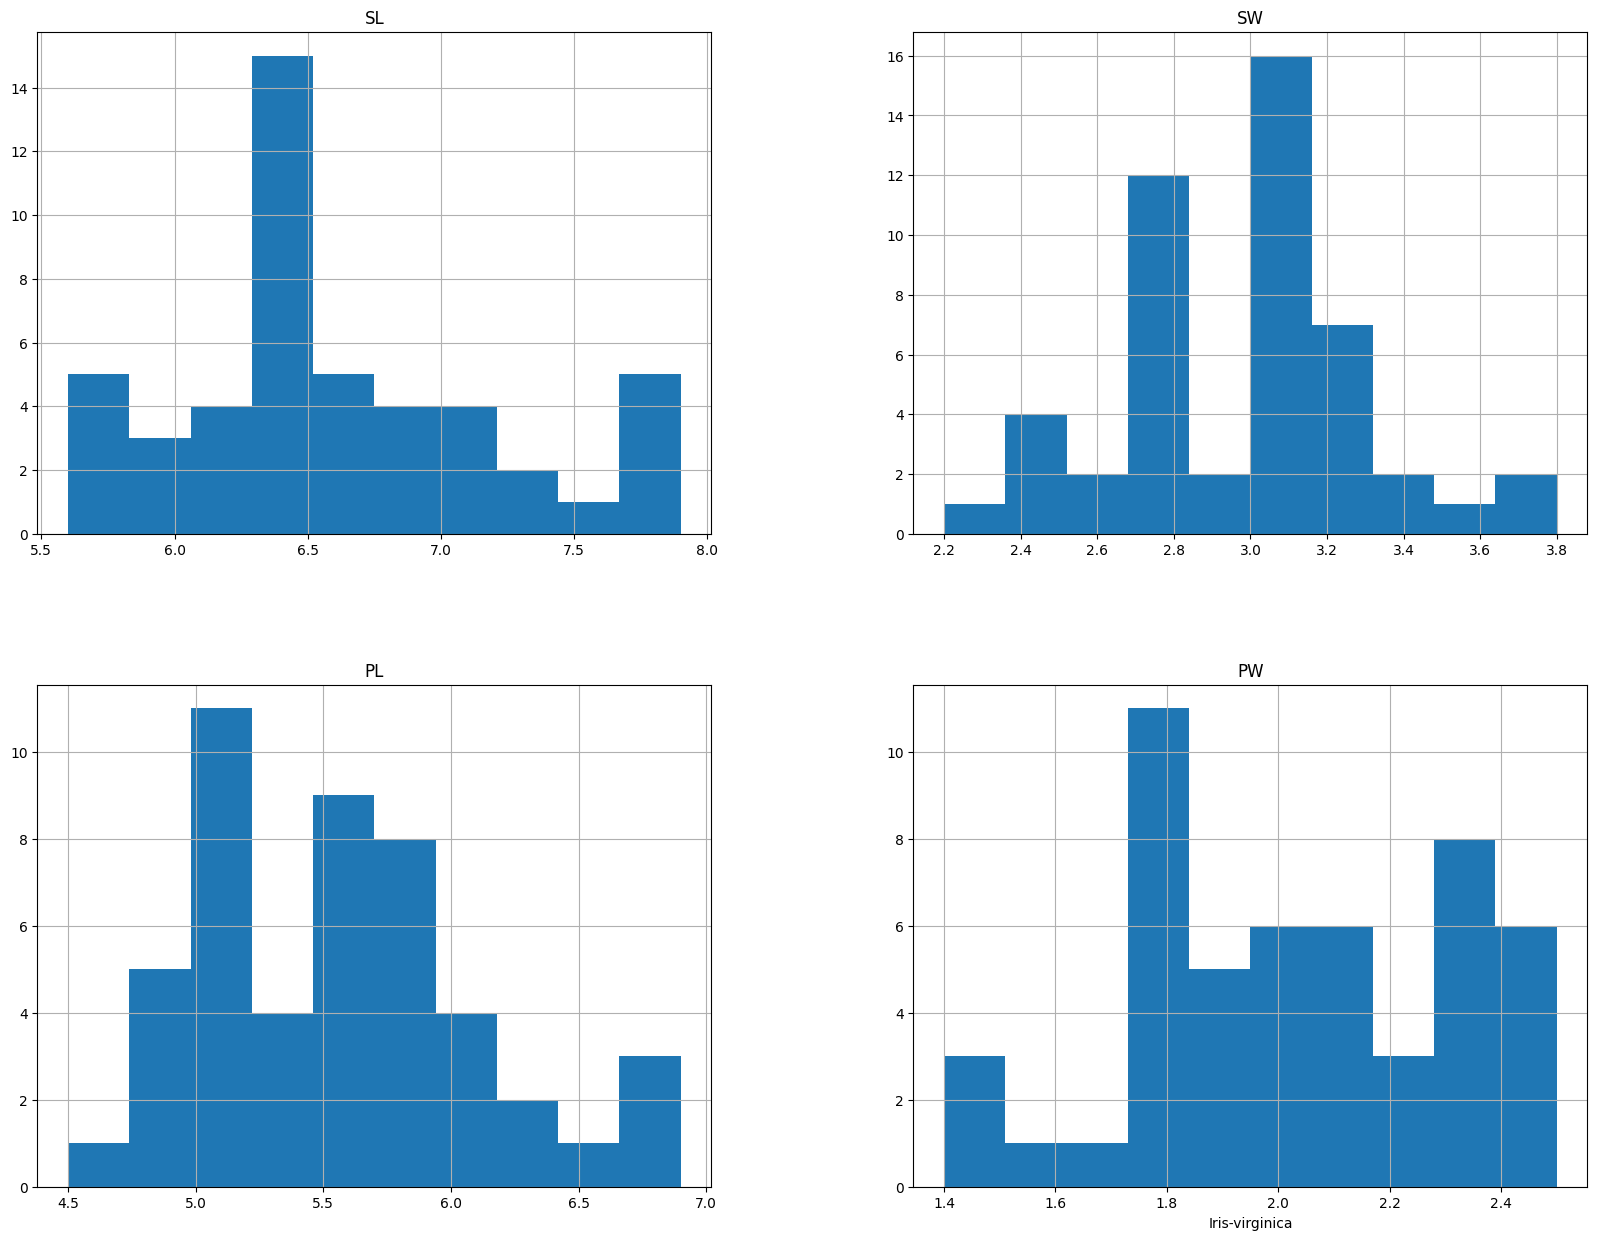

In [36]:
freqgraph=Iris_setosa.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.xlabel('Iris_setosa')
plt.show()

freqgraph=Iris_versicolor.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.xlabel('Iris-versicolor')
plt.show()

freqgraph=Iris_virginica.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.xlabel('Iris-virginica')
plt.show()

finding the skewness value of data distribution of SL SW and PL where there are missing values

In [37]:
print('Iris_setosa\n')
print('Skewness value of Sepal Length : ',Iris_setosa['SL'].skew())
print('Skewness value of Sepal Width : ',Iris_setosa['SW'].skew())
print('Skewness value of Petal Length : ',Iris_setosa['PL'].skew())
print('\nIris_versicolor\n')
print('Skewness value of Sepal Length : ',Iris_versicolor['SL'].skew())
print('Skewness value of Sepal Width : ',Iris_versicolor['SW'].skew())
print('Skewness value of Petal Length : ',Iris_versicolor['PL'].skew())
print('\nIris_virginica\n')
print('Skewness value of Sepal Length : ',Iris_virginica['SL'].skew())
print('Skewness value of Sepal Width : ',Iris_virginica['SW'].skew())
print('Skewness value of Petal Length : ',Iris_virginica['PL'].skew())

Iris_setosa

Skewness value of Sepal Length :  0.11120734794013022
Skewness value of Sepal Width :  0.17334760923456546
Skewness value of Petal Length :  0.007253522419669448

Iris_versicolor

Skewness value of Sepal Length :  0.1564438199889125
Skewness value of Sepal Width :  -0.45733341911255476
Skewness value of Petal Length :  -0.5773625043590145

Iris_virginica

Skewness value of Sepal Length :  0.4931740317635753
Skewness value of Sepal Width :  0.41648626690249846
Skewness value of Petal Length :  0.5702666548011346


In [38]:
#the skewness value between -1/2 and +1/2 = approximately symmetric distribution and hence we can use mean to replace the missing values
# Skewness value of PL of ris_versicolor and Iris_virginica is between -1 and -1/2 or  +1/2 and +1 = moderately skewed distribution and hence we can use median to replace the missing values

: Feature engineering - Missing value handling



In [39]:
Iris_setosa['SL']=Iris_setosa['SL'].fillna(Iris_setosa['SL'].mean())
Iris_setosa['SW']=Iris_setosa['SW'].fillna(Iris_setosa['SW'].mean())
Iris_setosa['PL']=Iris_setosa['PL'].fillna(Iris_setosa['PL'].mean())

Iris_versicolor['SL']=Iris_versicolor['SL'].fillna(Iris_versicolor['SL'].mean())
Iris_versicolor['SW']=Iris_versicolor['SW'].fillna(Iris_versicolor['SW'].mean())
Iris_versicolor['PL']=Iris_versicolor['PL'].fillna(Iris_versicolor['PL'].median())

Iris_virginica['SL']=Iris_virginica['SL'].fillna(Iris_virginica['SL'].mean())
Iris_virginica['SW']=Iris_virginica['SW'].fillna(Iris_virginica['SW'].mean())
Iris_virginica['PL']=Iris_virginica['PL'].fillna(Iris_virginica['PL'].median())

<ipython-input-39-1bb47af991bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iris_setosa['SL']=Iris_setosa['SL'].fillna(Iris_setosa['SL'].mean())
<ipython-input-39-1bb47af991bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Iris_setosa['SW']=Iris_setosa['SW'].fillna(Iris_setosa['SW'].mean())
<ipython-input-39-1bb47af991bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Finding the number of missing values

In [40]:
print('Null values of Iris_setosa\n', Iris_setosa.isna().sum())
print('Null values of Iris-versicolor\n', Iris_versicolor.isna().sum())
print('Null values of Iris-virginica\n', Iris_virginica.isna().sum())

Null values of Iris_setosa
 SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64
Null values of Iris-versicolor
 SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64
Null values of Iris-virginica
 SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64


Combine the 3 data frames after replacing the missing value to a single data frame in variable "data"

In [82]:
frames=[Iris_setosa,Iris_versicolor,Iris_virginica]
data=pd.concat(frames)
display(data)

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,Iris-setosa
1,4.900000,3.0,1.40,0.2,Iris-setosa
2,5.008511,3.2,1.30,0.2,Iris-setosa
3,4.600000,3.1,1.50,0.2,Iris-setosa
4,5.000000,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,Iris-virginica
146,6.300000,2.5,5.00,1.9,Iris-virginica
147,6.500000,3.0,5.55,2.0,Iris-virginica
148,6.200000,3.4,5.40,2.3,Iris-virginica


In [83]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [84]:
# Creating a list of numerical values

numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

#display the numerical variables

data[numerical_features].head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.008511,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [85]:
# all the 4 numerical features are of similar kind showig the length and width of petals and sepals of different classifications of Iris flower

In [86]:
numerical_features

['SL', 'SW', 'PL', 'PW']

Step 4 : Check out the outliers

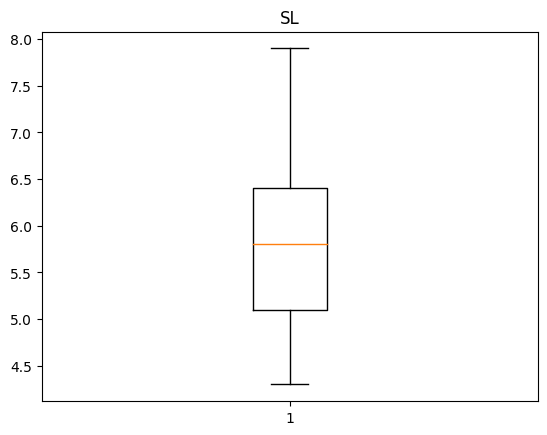

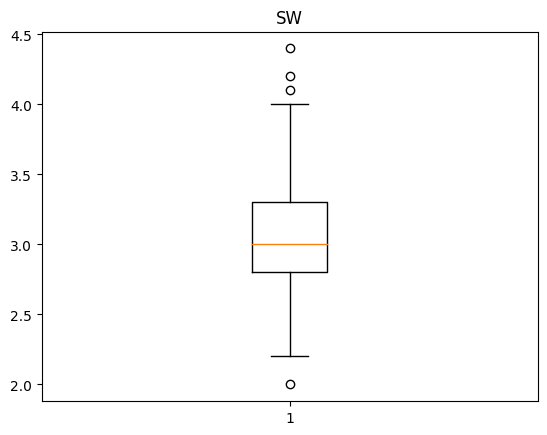

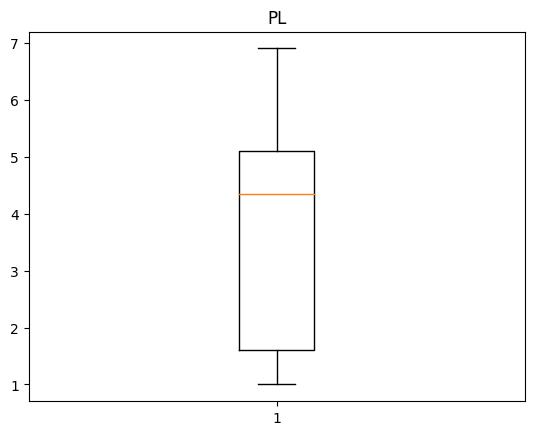

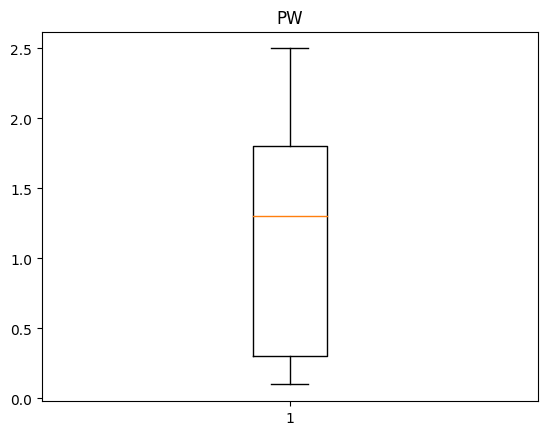

In [87]:
for i in numerical_features:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [88]:
# only the Sepal Width shows outliers

Finding the Quartile values

In [89]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

<ipython-input-89-c25d27549f3a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
<ipython-input-89-c25d27549f3a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
<ipython-input-89-c25d27549f3a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data[

Print those values

In [90]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


Find Inter Quartile Range

In [91]:
IQR=Q3-Q1
print(IQR)

0.5


With IQR find lower and upper limits of values

In [92]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

print(up_lim)
print(low_lim)

4.05
2.05


finding outlier values

In [93]:
outliers=[]
for x in data ['SW']:
  if(x>up_lim)or(x<low_lim):
    outliers.append(x)

print(outliers)

[4.4, 4.1, 4.2, 2.0]


In [53]:
# we have values above and below the upper and lower limits

ind1=data[(data['SW']>up_lim) |( data['SW']<low_lim)]
ind1.index

Int64Index([15, 32, 33, 60], dtype='int64')

 : Feature Engineering - Handling the outlier

In [54]:
data.drop([15, 32, 33, 60],inplace=True) 
#since it is raw value no need to specify index position , if it is column  need to specify index positin too

:Step 5 : See the Categorical Values

In [55]:
#Check for variable data types

data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [56]:
# since the data set consists of only 5 columns,it is easy to find categorical column with the dtype commanditself
# there is only one categorical column named " Classification" other 4 columns are numeric

In [57]:
print('The  number of unique values in Clasification column is {} '.format(len(data['Classification'].unique()))) 

print('\nThe unique values in Clasification column are {} '.format(data['Classification'].unique()))

  #{} indicates length and name of unique values in corresponding feature

The  number of unique values in Clasification column is 3 

The unique values in Clasification column are ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 


In [ ]:
# Since the categorical column 'Clasification' isthe target column no need of encoding to be done on it


Step 6 : Splitting the data-set into Training and Test Set

In [60]:
#split into target and fetures

X=data.drop('Classification',axis=1) # features in X
y=data['Classification']             # target in y

In [61]:
#split into taining and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

**3. Find out which classification model gives the best result (try all the 
classification algorithms discussed in the session)**

**Classification Model - Logistic regression**

In [62]:
from sklearn.linear_model import LogisticRegression # importing LogisticRegression

logit_model=LogisticRegression()                    # creating an instance
logit_model.fit(X_train,y_train)                    # fit the model         
y_pred_lr=logit_model.predict(X_test)               # prediction 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating the model with evaluation metrics

In [66]:
#need to check confussion matrix and evaluation metrics

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('Acuracy=',accuracy_score(y_test,y_pred_lr))
print('Precision=',precision_score(y_test,y_pred_lr,average='weighted'))
print('Recall=',recall_score(y_test,y_pred_lr,average='weighted'))
print('F1 score=',f1_score(y_test,y_pred_lr,average='weighted'))

Acuracy= 0.972972972972973
Precision= 0.9759759759759761
Recall= 0.972972972972973
F1 score= 0.973227344992051


In [67]:
confusion_matrix(y_test,y_pred_lr)

array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 12]])

In [ ]:
# There are maximum true predictions in the evaluation

In [70]:
#predicted values

y_pred_lr

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [71]:
# values given for testing

y_test

48         Iris-setosa
101     Iris-virginica
28         Iris-setosa
20         Iris-setosa
45         Iris-setosa
124     Iris-virginica
30         Iris-setosa
84     Iris-versicolor
70     Iris-versicolor
19         Iris-setosa
12         Iris-setosa
119     Iris-virginica
145     Iris-virginica
82     Iris-versicolor
141     Iris-virginica
39         Iris-setosa
64     Iris-versicolor
143     Iris-virginica
31         Iris-setosa
58     Iris-versicolor
100     Iris-virginica
126     Iris-virginica
11         Iris-setosa
71     Iris-versicolor
34         Iris-setosa
97     Iris-versicolor
68     Iris-versicolor
105     Iris-virginica
118     Iris-virginica
9          Iris-setosa
4          Iris-setosa
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
17         Iris-setosa
10         Iris-setosa
142     Iris-virginica
Name: Classification, dtype: object

**k Nearest Neighbor**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15) # taking neighbor values of ranks from 3 to 14

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn) # storing the accuracy score
    metric.append(acc)                      # storing the accuracy score of each neighbor value to metric

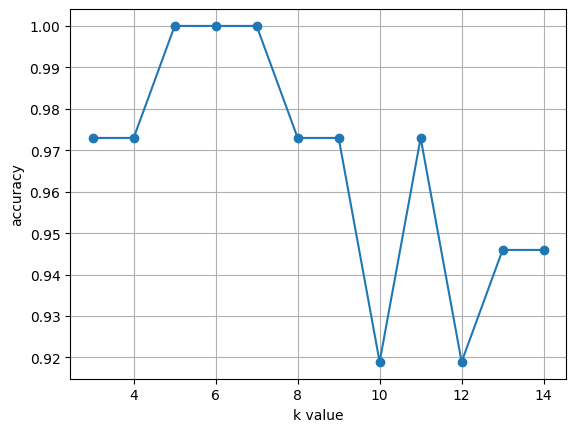

In [74]:
#ploting for the accuracy scores stored

plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [75]:
# k=1 has more accurcy  from the above graph fit it with the neighbor value

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('Acuracy=',accuracy_score(y_test,y_pred_knn))
print('Precision=',precision_score(y_test,y_pred_knn,average='weighted'))
print('Recall=',recall_score(y_test,y_pred_knn,average='weighted'))
print('F1 score=',f1_score(y_test,y_pred_knn,average='weighted'))

Acuracy= 0.9459459459459459
Precision= 0.9459459459459459
Recall= 0.9459459459459459
F1 score= 0.9459459459459459


In [80]:
confusion_matrix(y_test,y_pred_knn)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]])

In [ ]:
# there are maximum true predictions in the evaluation

**Since Accuracy value of Logistic Regression shows 0.97 and that of kNN shows 0.94 ,lets conclude that Logistic Regression Model is best with this Iris Data set.**

Step 7 : Feature Scaling

In [ ]:
# Since all the numerical featurs such as Sepal Length, Petal Length, Sepal Width, Petal Width are of the same scale or unit no need of scaling to be done.